In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

In [2]:
# importing the dataset
ds=pd.read_csv(r"C:\Users\guna5\Downloads\Crop_recommendation.csv")

In [3]:
# printing the original dataset
print(ds)

      Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall   label  Unnamed: 8  Unnamed: 9  
0     202.935536    rice         NaN         NaN

In [4]:
# dropping unnecessary columns in the dataset
columnstodrop=['Unnamed: 8','Unnamed: 9']
ds.drop(columns=columnstodrop,inplace=True)

In [5]:
# printing the dataset after droping columns
print(ds)

      Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall   label  
0     202.935536    rice  
1     226.655537    rice  
2     263.964248  

In [6]:
# making a dataframe
df=pd.DataFrame(ds)
# printing the top 5 values of a dataframe
print("TOP 5:")
print(df.head())
# printing the last 5 values of a dataframe
print("LAST 5:")
print(df.tail())

TOP 5:
   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice  
LAST 5:
      Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.6

In [7]:
# changing the names of the column in the dataframe
column_names=["NITROGEN","PHOSPHORUS","POTASSIUM","TEMPERATURE","HUMIDITY","SOIL PH","RAINFALL","CROP"]
df.columns=column_names
print(df)

      NITROGEN  PHOSPHORUS  POTASSIUM  TEMPERATURE   HUMIDITY   SOIL PH  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        RAINFALL    CROP  
0     202.935536    rice  
1     226.655537    rice  
2     263.964248  

In [8]:
# checking the dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NITROGEN     2200 non-null   int64  
 1   PHOSPHORUS   2200 non-null   int64  
 2   POTASSIUM    2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   SOIL PH      2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   CROP         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [9]:
# checking for missing values
print(df.isnull().sum())

NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
SOIL PH        0
RAINFALL       0
CROP           0
dtype: int64


In [10]:
# finding duplicate rows in the dataframe
duplicate_rows=df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [NITROGEN, PHOSPHORUS, POTASSIUM, TEMPERATURE, HUMIDITY, SOIL PH, RAINFALL, CROP]
Index: []


In [11]:
# storing the non outlier values into a new dataframe
df1=df.copy()

In [12]:
print(df1.head())

   NITROGEN  PHOSPHORUS  POTASSIUM  TEMPERATURE   HUMIDITY   SOIL PH  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     RAINFALL  CROP  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice  


In [13]:
df1.shape

(2200, 8)

In [14]:
result=df1.groupby('CROP').size()
print(result)

CROP
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64


In [15]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NITROGEN     2200 non-null   int64  
 1   PHOSPHORUS   2200 non-null   int64  
 2   POTASSIUM    2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   SOIL PH      2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   CROP         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [16]:
# splitting into dependent and independent variable
# Independent variable
x=df1.iloc[:,:-1]
print("INDEPENDENT VARIABLE")
print(x)
# Dependent variable
y=df1.iloc[:,-1]
print("DEPENDENT VARIABLE")
print(y)

INDEPENDENT VARIABLE
      NITROGEN  PHOSPHORUS  POTASSIUM  TEMPERATURE   HUMIDITY   SOIL PH  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        RAINFALL  
0     202.935536  
1     226.655537  
2     263.964248  
3 

C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\1179496856.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(sns.heatmap(df1.corr()))


Axes(0.125,0.11;0.62x0.77)


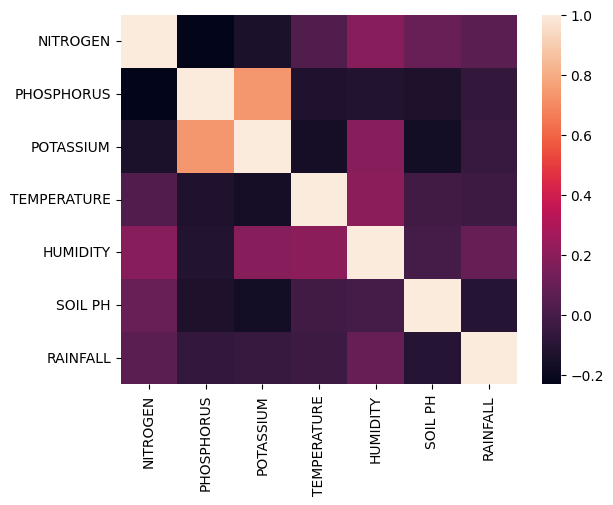

In [17]:
# printing the heatmap to show the correlation between each attributes
import seaborn as sns
print(sns.heatmap(df1.corr()))

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
x_train_selected = selector.fit_transform(x_train, y_train)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = x.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['NITROGEN', 'PHOSPHORUS', 'POTASSIUM', 'HUMIDITY', 'RAINFALL'], dtype='object')


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [21]:
models={
    'LOGISTIC REGRESSION': LogisticRegression(),
    'DECISION TREES': DecisionTreeClassifier(),
    'RANDOM FOREST': RandomForestClassifier(),
    'SVM': svm.SVC(),
    'KNN': KNeighborsClassifier(),
    'NAIVE BAYES': GaussianNB(),
    'GRADIENT BOOSTING': GradientBoostingClassifier()
}

In [22]:
# getting accuracy for each and every algorithm
from sklearn.metrics import accuracy_score,precision_score,recall_score
acc=[]
pre=[]
rec=[]
model=models.keys()
m=list(model)
print(m)
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    precision=precision_score(y_test,y_pred,average='weighted')
    recall=recall_score(y_test,y_pred,average='weighted')
    pre.append(precision)
    rec.append(recall)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Precision: {precision:.4f}")
    print(f"{model_name} Recall: {recall:.4f}")
print(acc)
print(pre)
print(rec)

['LOGISTIC REGRESSION', 'DECISION TREES', 'RANDOM FOREST', 'SVM', 'KNN', 'NAIVE BAYES', 'GRADIENT BOOSTING']


c:\Users\guna5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC REGRESSION Accuracy: 0.9455
LOGISTIC REGRESSION Precision: 0.9466
LOGISTIC REGRESSION Recall: 0.9455
DECISION TREES Accuracy: 0.9864
DECISION TREES Precision: 0.9869
DECISION TREES Recall: 0.9864
RANDOM FOREST Accuracy: 0.9932
RANDOM FOREST Precision: 0.9937
RANDOM FOREST Recall: 0.9932
SVM Accuracy: 0.9614
SVM Precision: 0.9673
SVM Recall: 0.9614
KNN Accuracy: 0.9705
KNN Precision: 0.9740
KNN Recall: 0.9705
NAIVE BAYES Accuracy: 0.9955
NAIVE BAYES Precision: 0.9958
NAIVE BAYES Recall: 0.9955
GRADIENT BOOSTING Accuracy: 0.9818
GRADIENT BOOSTING Precision: 0.9843
GRADIENT BOOSTING Recall: 0.9818
[0.9454545454545454, 0.9863636363636363, 0.9931818181818182, 0.9613636363636363, 0.9704545454545455, 0.9954545454545455, 0.9818181818181818]
[0.9466475532785692, 0.9868759018759019, 0.9937348484848485, 0.9672692837465565, 0.9739764067350275, 0.9958181818181817, 0.9842712842712842]
[0.9454545454545454, 0.9863636363636363, 0.9931818181818182, 0.9613636363636363, 0.9704545454545455, 0.9954

<Axes: title={'center': 'Recall Comparison'}, xlabel='Recall', ylabel='Algorithm'>

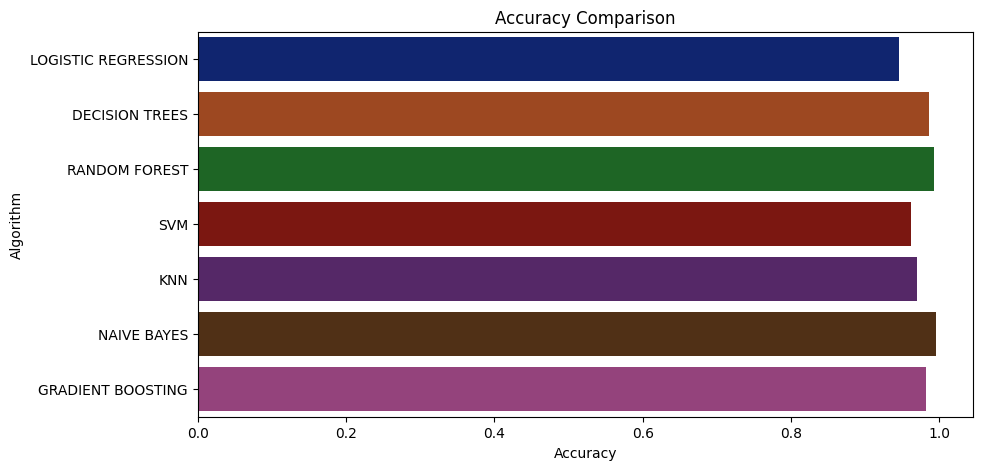

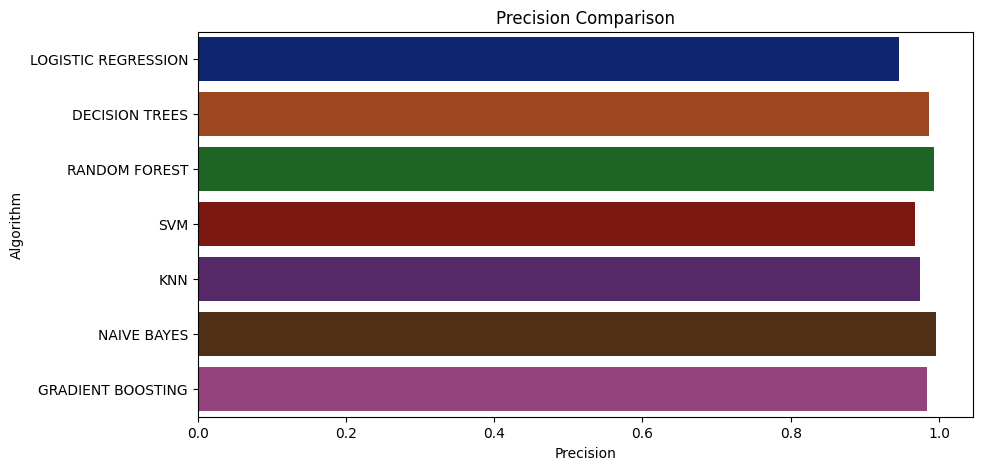

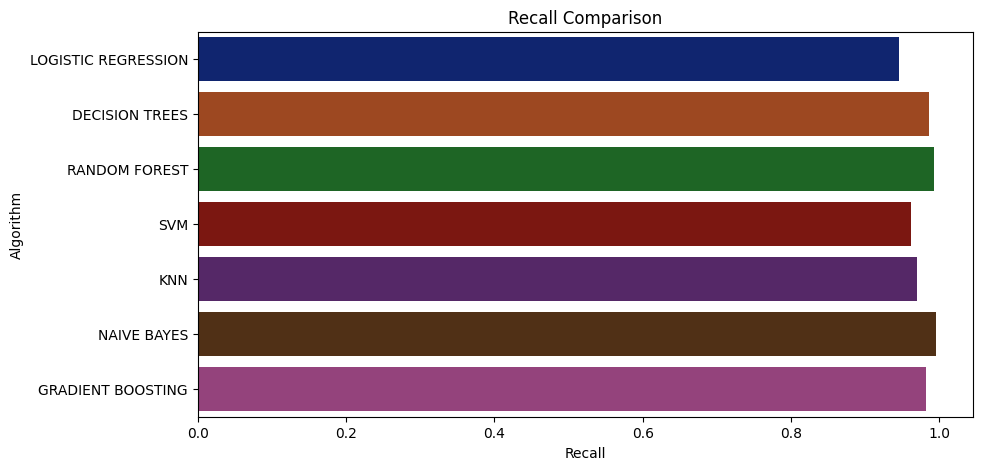

In [23]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = m,palette='dark')
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
sns.barplot(x = pre,y = m,palette='dark')
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
sns.barplot(x = rec,y = m,palette='dark')

c:\Users\guna5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


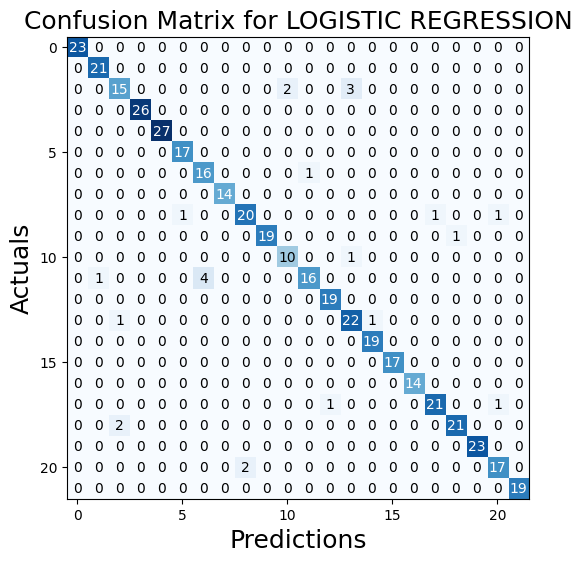

Model: LOGISTIC REGRESSION
Class 0:
True Positives (TP): 23
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 417

Class 1:
True Positives (TP): 21
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN): 418

Class 2:
True Positives (TP): 15
False Positives (FP): 3
False Negatives (FN): 5
True Negatives (TN): 417

Class 3:
True Positives (TP): 26
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 414

Class 4:
True Positives (TP): 27
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 413

Class 5:
True Positives (TP): 17
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN): 422

Class 6:
True Positives (TP): 16
False Positives (FP): 4
False Negatives (FN): 1
True Negatives (TN): 419

Class 7:
True Positives (TP): 14
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 426

Class 8:
True Positives (TP): 20
False Positives (FP): 2
False Negatives (FN): 3
True Negatives (TN): 415

Class 9:
T

C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipyker

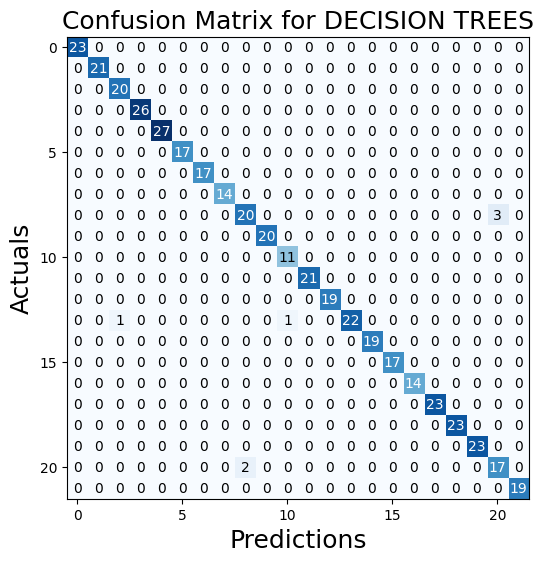

Model: DECISION TREES
Class 0:
True Positives (TP): 23
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 417

Class 1:
True Positives (TP): 21
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 419

Class 2:
True Positives (TP): 20
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN): 419

Class 3:
True Positives (TP): 26
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 414

Class 4:
True Positives (TP): 27
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 413

Class 5:
True Positives (TP): 17
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 423

Class 6:
True Positives (TP): 17
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 423

Class 7:
True Positives (TP): 14
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 426

Class 8:
True Positives (TP): 20
False Positives (FP): 2
False Negatives (FN): 3
True Negatives (TN): 415

Class 9:
True P

C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipyker

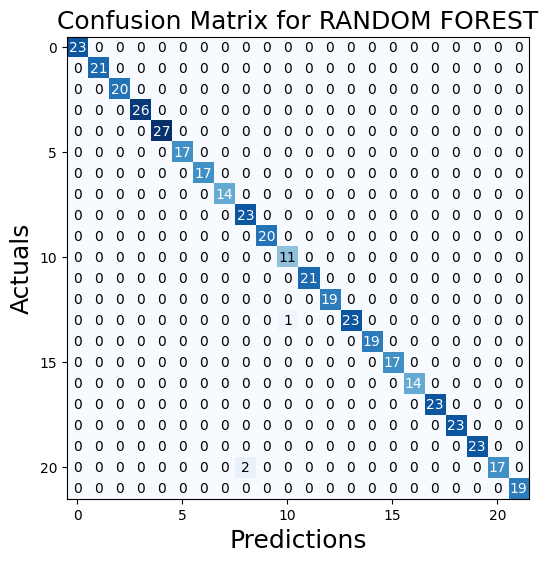

Model: RANDOM FOREST
Class 0:
True Positives (TP): 23
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 417

Class 1:
True Positives (TP): 21
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 419

Class 2:
True Positives (TP): 20
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 420

Class 3:
True Positives (TP): 26
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 414

Class 4:
True Positives (TP): 27
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 413

Class 5:
True Positives (TP): 17
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 423

Class 6:
True Positives (TP): 17
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 423

Class 7:
True Positives (TP): 14
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 426

Class 8:
True Positives (TP): 23
False Positives (FP): 2
False Negatives (FN): 0
True Negatives (TN): 415

Class 9:
True Po

C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipyker

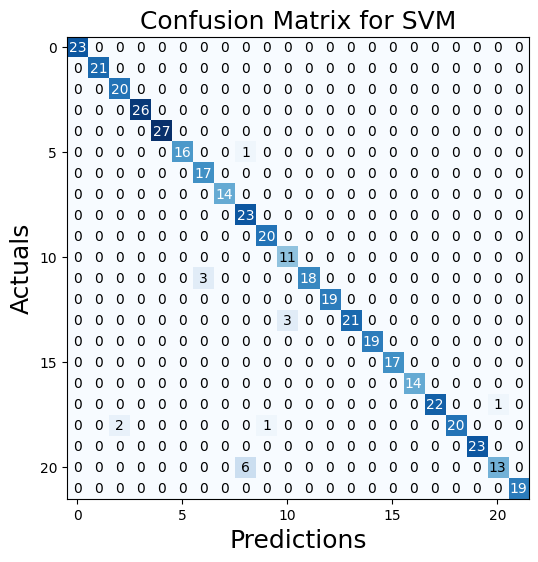

Model: SVM
Class 0:
True Positives (TP): 23
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 417

Class 1:
True Positives (TP): 21
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 419

Class 2:
True Positives (TP): 20
False Positives (FP): 2
False Negatives (FN): 0
True Negatives (TN): 418

Class 3:
True Positives (TP): 26
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 414

Class 4:
True Positives (TP): 27
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 413

Class 5:
True Positives (TP): 16
False Positives (FP): 0
False Negatives (FN): 1
True Negatives (TN): 423

Class 6:
True Positives (TP): 17
False Positives (FP): 3
False Negatives (FN): 0
True Negatives (TN): 420

Class 7:
True Positives (TP): 14
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 426

Class 8:
True Positives (TP): 23
False Positives (FP): 7
False Negatives (FN): 0
True Negatives (TN): 410

Class 9:
True Positives (T

C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipyker

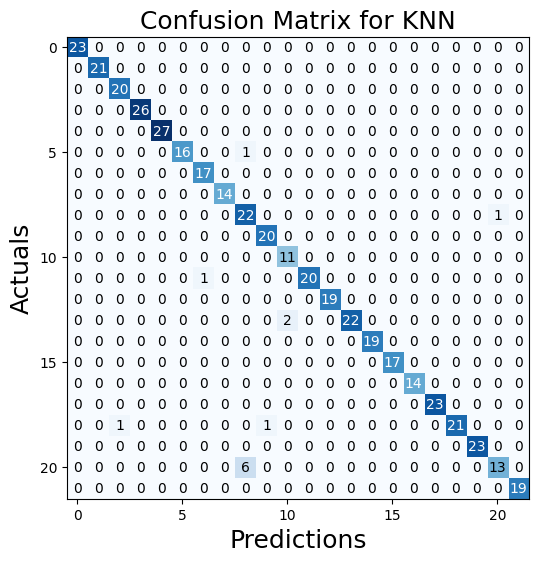

Model: KNN
Class 0:
True Positives (TP): 23
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 417

Class 1:
True Positives (TP): 21
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 419

Class 2:
True Positives (TP): 20
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN): 419

Class 3:
True Positives (TP): 26
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 414

Class 4:
True Positives (TP): 27
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 413

Class 5:
True Positives (TP): 16
False Positives (FP): 0
False Negatives (FN): 1
True Negatives (TN): 423

Class 6:
True Positives (TP): 17
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN): 422

Class 7:
True Positives (TP): 14
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 426

Class 8:
True Positives (TP): 22
False Positives (FP): 7
False Negatives (FN): 1
True Negatives (TN): 410

Class 9:
True Positives (T

C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipyker

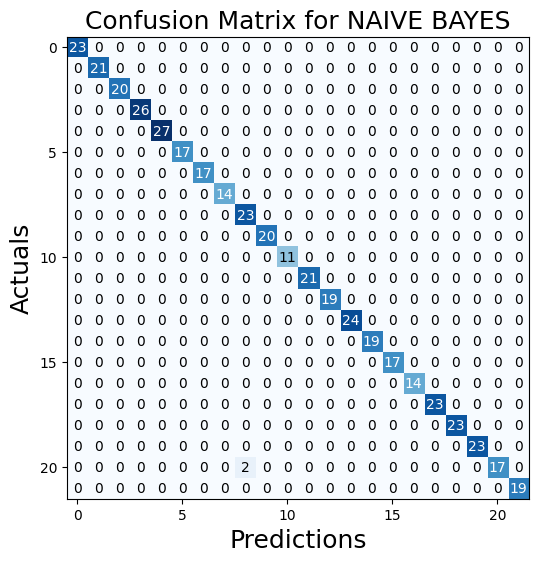

Model: NAIVE BAYES
Class 0:
True Positives (TP): 23
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 417

Class 1:
True Positives (TP): 21
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 419

Class 2:
True Positives (TP): 20
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 420

Class 3:
True Positives (TP): 26
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 414

Class 4:
True Positives (TP): 27
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 413

Class 5:
True Positives (TP): 17
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 423

Class 6:
True Positives (TP): 17
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 423

Class 7:
True Positives (TP): 14
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 426

Class 8:
True Positives (TP): 23
False Positives (FP): 2
False Negatives (FN): 0
True Negatives (TN): 415

Class 9:
True Posi

C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipyker

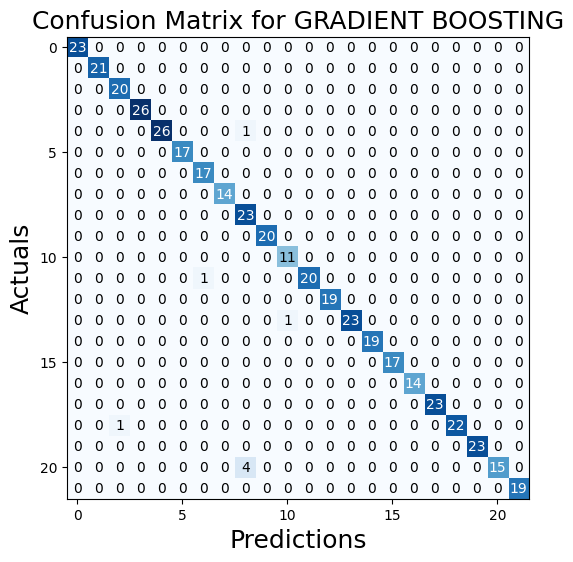

Model: GRADIENT BOOSTING
Class 0:
True Positives (TP): 23
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 417

Class 1:
True Positives (TP): 21
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 419

Class 2:
True Positives (TP): 20
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN): 419

Class 3:
True Positives (TP): 26
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 414

Class 4:
True Positives (TP): 26
False Positives (FP): 0
False Negatives (FN): 1
True Negatives (TN): 413

Class 5:
True Positives (TP): 17
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 423

Class 6:
True Positives (TP): 17
False Positives (FP): 1
False Negatives (FN): 0
True Negatives (TN): 422

Class 7:
True Positives (TP): 14
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 426

Class 8:
True Positives (TP): 23
False Positives (FP): 5
False Negatives (FN): 0
True Negatives (TN): 412

Class 9:
Tru

C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipykernel_19380\3308973909.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultstable = resultstable.append({
C:\Users\guna5\AppData\Local\Temp\ipyker

In [24]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
columns = ['Model', 'Class', 'TP', 'FP', 'FN', 'TN']
resultstable=pd.DataFrame(columns=columns)
for model_name,model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    fig,ax=plot_confusion_matrix(conf_mat=cm,figsize=(6,6),cmap=plt.cm.Blues)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=18)
    plt.show()
    print(f"Model: {model_name}")
    # Calculate TP, FP, FN, TN for each class
    for i in range(len(cm)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (FP + FN + TP)
        print(f"Class {i}:")
        print(f"True Positives (TP): {TP}")
        print(f"False Positives (FP): {FP}")
        print(f"False Negatives (FN): {FN}")
        print(f"True Negatives (TN): {TN}\n")
        resultstable = resultstable.append({
            'Model': model_name,
            'Class': i,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }, ignore_index=True)
resultstable.set_index(['Model', 'Class'], inplace=True)
print(resultstable)

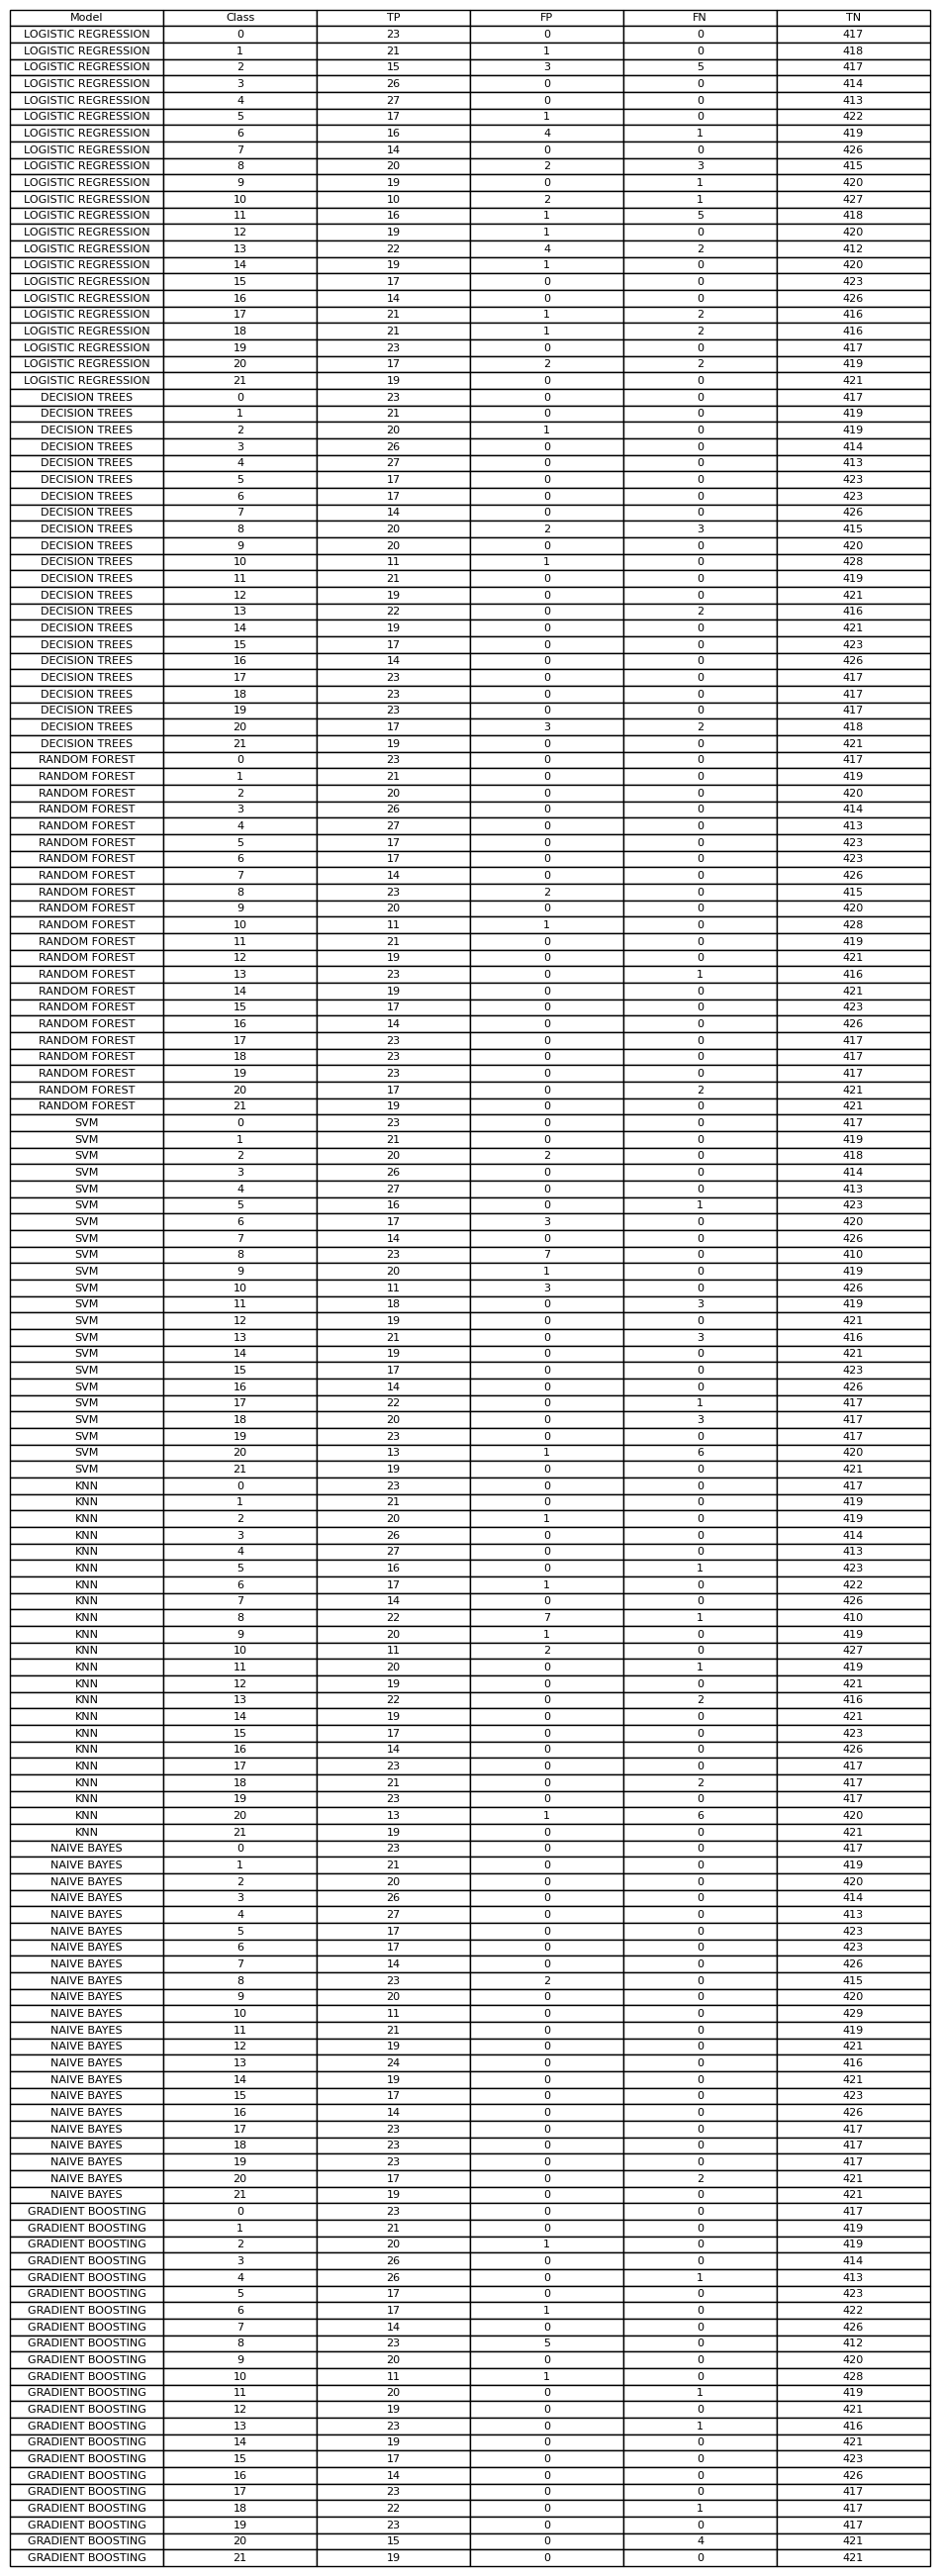

In [25]:
resultstable = resultstable.reset_index()
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size as per your need
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=resultstable.values, colLabels=resultstable.columns, cellLoc='center', loc='center')

plt.show()

In [26]:
# since random forest has more accuarcy we are going to select random forest to predict the outcomes
rfc=RandomForestClassifier(max_depth=10,min_samples_leaf=5,n_estimators=100,max_features='sqrt')
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5)

In [27]:
import pickle as pkl

In [28]:
y_pred=rfc.predict(x_test)
print(y_pred)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'maize' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'blackgram' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'pigeonpeas' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'coffee' 'chickpea' 'rice' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'mothbeans' 'kidneybeans'
 

In [29]:
# printing the accuracy of the model
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model is:",acc)

Accuracy of the model is: 0.9954545454545455


In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

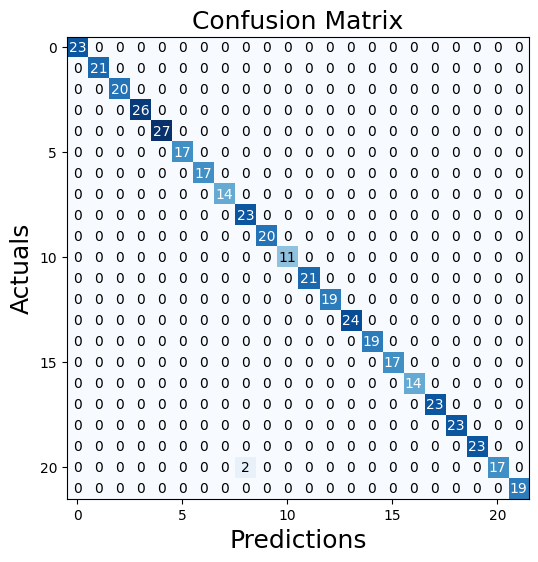

In [31]:
from mlxtend.plotting import plot_confusion_matrix
fig,ax=plot_confusion_matrix(conf_mat=cm,figsize=(6,6),cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x,y)
print(score)

[0.99772727 0.99318182 0.99545455 0.99545455 0.98409091]


In [34]:
# finding the test and train scores
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print(f"Training accuracy: {train_score:.3f}")
print(f"Test accuracy: {test_score:.3f}")

Training accuracy: 1.000
Test accuracy: 0.982


In [35]:
def predict():
    NITROGEN = int(input("Nitrogen: "))
    PHOSPHORUS = int(input("Phosphorus: "))
    POTASSIUM = int(input("Potassium: "))
    TEMPERATURE = float(input("Temperature: "))
    HUMIDITY = float(input("Humidity: "))
    SOILPH = float(input("Soil pH: "))
    RAINFALL = float(input("Rainfall: "))
    return rfc.predict([[NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,SOILPH,RAINFALL]])
image=predict()
print(image)

['rice']


c:\Users\guna5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [36]:
pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import cv2
crop_images = {
    "rice": r"C:\Users\guna5\OneDrive\Desktop\Project Images\rice.jpg",
    "coffee": r"C:\Users\guna5\OneDrive\Desktop\Project Images\coffee.jpg",
    "apple":r"C:\Users\guna5\OneDrive\Desktop\Project Images\Apple.webp",
    "banana":r"C:\Users\guna5\OneDrive\Desktop\Project Images\banana.webp",
    "blackgram":r"C:\Users\guna5\OneDrive\Desktop\Project Images\blackgram.jpg",
    "chickpea":r"C:\Users\guna5\OneDrive\Desktop\Project Images\chickpea.jpg",
    "coconut":r"C:\Users\guna5\OneDrive\Desktop\Project Images\coconut.webp",
    "cotton":r"C:\Users\guna5\OneDrive\Desktop\Project Images\cotton.webp",
    "grapes":r"C:\Users\guna5\OneDrive\Desktop\Project Images\grapes.jpg",
    "jute":r"C:\Users\guna5\OneDrive\Desktop\Project Images\jute.jpg",
    "kidneybeans":r"C:\Users\guna5\OneDrive\Desktop\Project Images\kidney beans.jpg",
    "lentil":r"C:\Users\guna5\OneDrive\Desktop\Project Images\lentill.jpg",
    "maize":r"C:\Users\guna5\OneDrive\Desktop\Project Images\maize.jpg",
    "mango":r"C:\Users\guna5\OneDrive\Desktop\Project Images\mango.webp",
    "mothbeans":r"C:\Users\guna5\OneDrive\Desktop\Project Images\moth bean.webp",
    "mungbean":r"C:\Users\guna5\OneDrive\Desktop\Project Images\mungbean.webp",
    "muskmelon":r"C:\Users\guna5\OneDrive\Desktop\Project Images\muskmelon.jpg",
    "orange":r"C:\Users\guna5\OneDrive\Desktop\Project Images\orange.webp",
    "papaya":r"C:\Users\guna5\OneDrive\Desktop\Project Images\papaya.webp",
    "pigeonpeas":r"C:\Users\guna5\OneDrive\Desktop\Project Images\pigeonpeas.jpg",
    "pomegranate":r"C:\Users\guna5\OneDrive\Desktop\Project Images\pomegranate.jpeg",
    "watermelon":r"C:\Users\guna5\OneDrive\Desktop\Project Images\watermelon.jpg"
}

def display_crop_image(crop_name):
    try:
        # Read the image using the dictionary
        image_path = crop_images.get(crop_name.lower())
        if image_path:
            img = cv2.imread(image_path)

            # Display the image
            cv2.imshow(f"{crop_name.capitalize()} Image", img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f"Image not found for crop: {crop_name}")

    except Exception as e:
        print(f"Error: {e}")
result = ', '.join(image)
display_crop_image(result)


Error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'

